In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                     sep = ';', header = 0)
redwine['type'] = 'red'
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
whitewine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                     sep = ';', header = 0)
whitewine['type'] = 'white'
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
wine = pd.concat([redwine, whitewine], axis = 0)
wine.shape

(6497, 13)

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [16]:
X = wine.drop(['type','quality'],axis = 1)
X.shape

(6497, 11)

In [18]:
y = wine.quality
y.shape

(6497,)

In [20]:
# 훈련 데이터와 테스트 데이터의 분리
# train_test_split이라는 함수 이용

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 11), (1625, 11), (4872,), (1625,))

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4547, 11), (1950, 11), (4547,), (1950,))

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.coef_

array([ 6.28087034e-02, -1.28415569e+00, -1.20208228e-01,  4.48389555e-02,
       -5.23856941e-01,  5.77935720e-03, -2.40314308e-03, -5.61650783e+01,
        3.50330785e-01,  8.03756989e-01,  2.70415935e-01])

In [26]:
model.intercept_

57.20683861403553

In [33]:
newdata = np.array([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5])

model.predict(np.reshape(newdata, (1,11)))

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.27698143])

In [31]:
y_pred = model.predict(X_test)
y_pred.shape

(1950,)

In [39]:
# 함수 직접 생성

def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real - y_pred)**2))

np.round(rmse(y_test, y_pred), 2)

0.73

In [40]:
# sklearn에서 지원되는 기능

from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

0.73

## 규제가 없는 선형 모델의 적합

In [42]:
from sklearn.model_selection import train_test_split

X = wine.drop(['type','quality'],axis = 1)
y = wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [74]:
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.764

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.729

In [76]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.729

In [77]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.764

C:\Users\user\AppData\Local\Temp\ipykernel_5888\3090857641.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)


Text(0.5, 1.0, 'ridge: alpha = 0.05, rmse = 0.729')

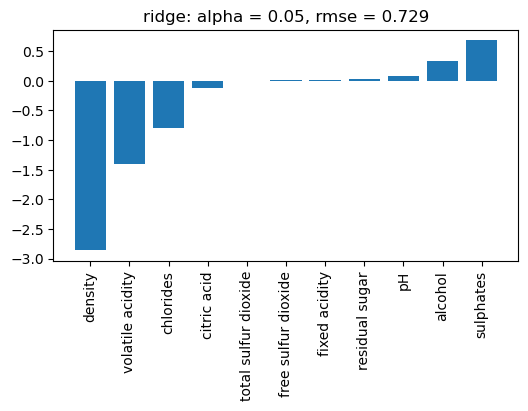

In [79]:
from sklearn.linear_model import Ridge

model_name = 'ridge'
alpha = 0.05
fig = plt.figure(figsize = (6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title('{0}: alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse))

C:\Users\user\AppData\Local\Temp\ipykernel_5888\1861959697.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)


Text(0.5, 1.0, 'lasso: alpha = 0.05, rmse = 0.764')

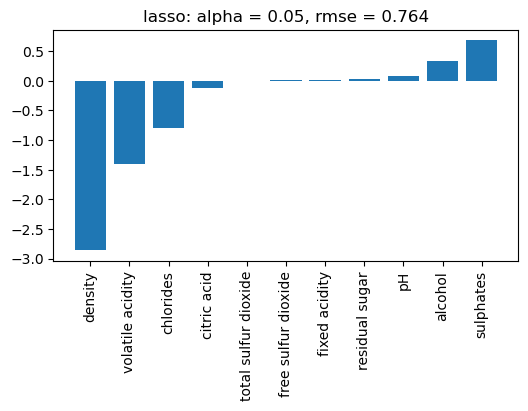

In [54]:
from sklearn.linear_model import Lasso

model_name = 'lasso'
alpha = 0.05
fig = plt.figure(figsize = (6,3))
ax = fig.add_subplot(111)
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
coef = pd.Series(data=ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation = 90)
ax.set_title('{0}: alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse))

C:\Users\user\AppData\Local\Temp\ipykernel_5888\3124752482.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)
C:\Users\user\AppData\Local\Temp\ipykernel_5888\3124752482.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)
C:\Users\user\AppData\Local\Temp\ipykernel_5888\3124752482.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)
C:\Users\user\AppData\Local\Temp\ipykernel_5888\3124752482.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index, rotation = 90)


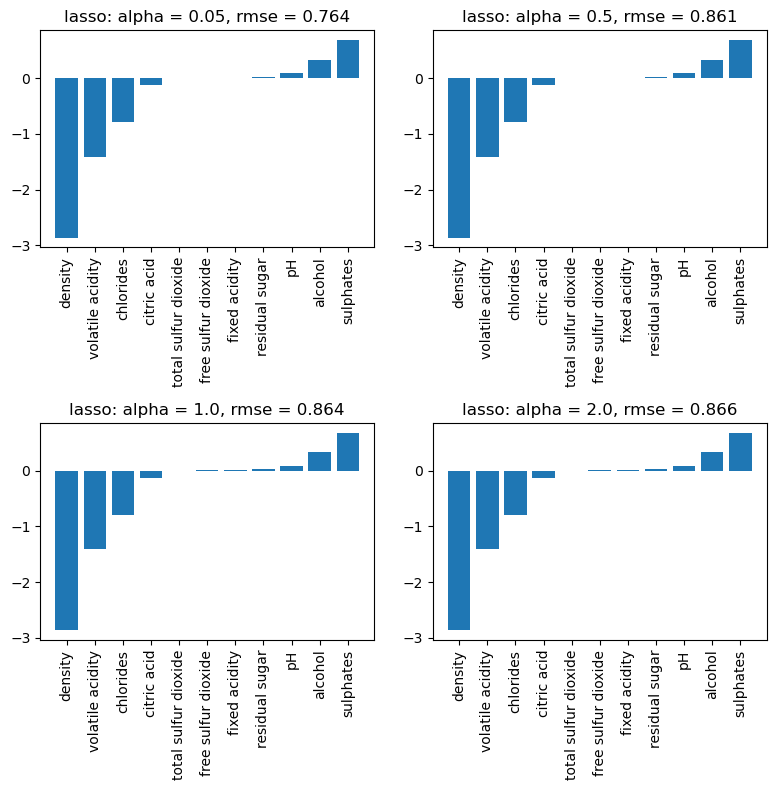

In [67]:
from sklearn.linear_model import Lasso

model_name = 'lasso'
alphas = [0.05, 0.5, 1.0, 2.0]
fig = plt.figure(figsize = (8,8))
cnt = 0

for alpha in alphas:
    cnt+=1
    ax = fig.add_subplot(2,2,cnt)
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)


    coef = pd.Series(data=ridge.coef_, index=X_train.columns).sort_values()
    ax.bar(coef.index, coef.values)
    ax.set_xticklabels(coef.index, rotation = 90)
    ax.set_title('{0}: alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse))
plt.tight_layout()